In [32]:
import numpy as np
import pymc as pm
import pytensor.tensor as pt

import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns

In [ ]:



wmu = pt.as_tensor([0,4])
sig = pt.as_tensor([1,1])

with pm.Model() as model:
    p = pm.Normal('p', mu=0, sigma=1, shape=(3))

    z = pm.Bernoulli('z', logit_p=pt.dot(x_tr, p), shape=(T))
    y = pm.Normal('y', mu=pt.sum(pt.dot(x_em, wmu[z]), 1), sigma=sig[z], observed=obs, shape=(T))

    trace = pm.sample(10000, return_inferencedata=True)
    

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p]
>BinaryGibbsMetropolis: [z]


Output()

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 28 seconds.
/home/nuttidalab/miniconda3/envs/ssm/lib/python3.10/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([[<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

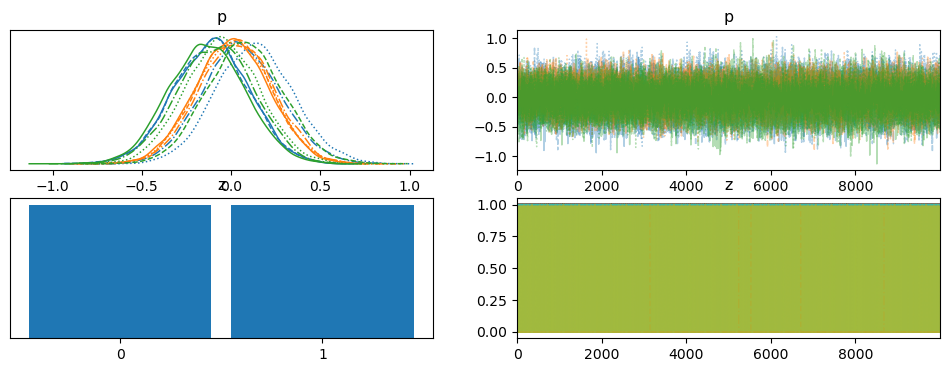

In [35]:
az.plot_trace(trace)

In [30]:
S, T = 312, 120

rng = np.random.default_rng(seed=42)

x_tr = rng.normal(size=(S, T, 3))
x_em = rng.normal(size=(S, T))
obs = rng.normal(0, 1, size=(S, T))


wmu = pt.as_tensor([0,4])

with pm.Model() as model:
    p = pm.Normal('p', mu=0, sigma=1, shape=(3))

    z = pm.Bernoulli('z', logit_p=pt.dot(x_tr, p), shape=(S, T))
    y = pm.Normal('y', mu=pt.dot(x_em, wmu[z]), sigma=1, observed=obs, shape=(S, T))

    trace = pm.sample(100000, return_inferencedata=True)
    

ValueError: shapes (312,120) and (312,120) not aligned: 120 (dim 1) != 312 (dim 0)
Apply node that caused the error: dot([[ 1.10644 ... 0858683 ]], Reshape{2}.0)
Toposort index: 9
Inputs types: [TensorType(float64, shape=(312, 120)), TensorType(int64, shape=(312, 120))]
Inputs shapes: [(312, 120), (312, 120)]
Inputs strides: [(960, 8), (960, 8)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[Composite{((-0.5 * sqr((i0 - i1))) - 0.9189385332046727)}(y{[[-2.84655 ... 4870e-01]]}, dot.0)]]

Backtrace when the node is created (use PyTensor flag traceback__limit=N to make it longer):
  File "/home/nuttidalab/miniconda3/envs/ssm/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
    return super().run_cell(*args, **kwargs)
  File "/home/nuttidalab/miniconda3/envs/ssm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell
    result = self._run_cell(
  File "/home/nuttidalab/miniconda3/envs/ssm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell
    result = runner(coro)
  File "/home/nuttidalab/miniconda3/envs/ssm/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
    coro.send(None)
  File "/home/nuttidalab/miniconda3/envs/ssm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/nuttidalab/miniconda3/envs/ssm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "/home/nuttidalab/miniconda3/envs/ssm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3566099/120909931.py", line 7, in <module>
    y = pm.Normal('y', mu=pt.dot(x_em, wmu[z]), sigma=1, observed=obs, shape=(S, T))

HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

In [23]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([[<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

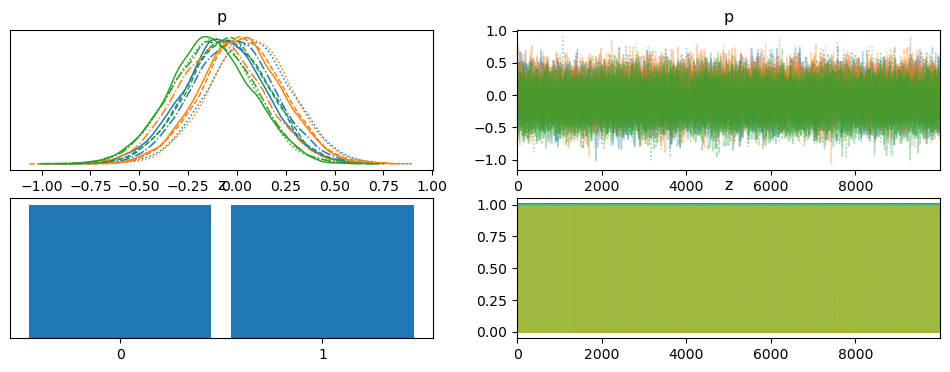

In [18]:
az.plot_trace(trace)

In [21]:
az.summary(trace)

/home/nuttidalab/miniconda3/envs/ssm/lib/python3.10/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/nuttidalab/miniconda3/envs/ssm/lib/python3.10/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/nuttidalab/miniconda3/envs/ssm/lib/python3.10/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/nuttidalab/miniconda3/envs/ssm/lib/python3.10/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/nuttidalab/miniconda3/envs

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p[0],-0.019,0.220,-0.427,0.398,0.024,0.017,83.0,818.0,1.03
p[1],0.006,0.220,-0.397,0.428,0.032,0.023,48.0,165.0,1.05
p[2],-0.109,0.215,-0.520,0.288,0.016,0.012,175.0,9001.0,1.02
z[0],0.489,0.500,0.000,1.000,0.125,0.090,16.0,16.0,1.18
z[1],1.000,0.000,1.000,1.000,0.000,0.000,40000.0,40000.0,NaN
...,...,...,...,...,...,...,...,...,...
z[115],1.000,0.000,1.000,1.000,0.000,0.000,40000.0,40000.0,NaN
z[116],1.000,0.000,1.000,1.000,0.000,0.000,40000.0,40000.0,NaN
z[117],1.000,0.000,1.000,1.000,0.000,0.000,40000.0,40000.0,NaN
z[118],0.486,0.500,0.000,1.000,0.002,0.001,67151.0,40000.0,1.00
